In [109]:
# Import Libaries and data

In [293]:
import numpy as np #linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
from textblob import TextBlob #used for sentiment analysis

In [294]:
df = pd.read_csv('netflix_titles.csv')

In [295]:
# Checking number od rows and columns in data

In [296]:
df.shape

(8807, 12)

In [297]:
# Checking content available in Database 

In [298]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [299]:
# How to check columns name of dataset

In [300]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [301]:
# Taking the count of ratings

In [302]:
x = df.groupby(['rating']).size().reset_index(name = 'counts')

In [303]:
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [304]:
# Creating the Piechart based on Content rating

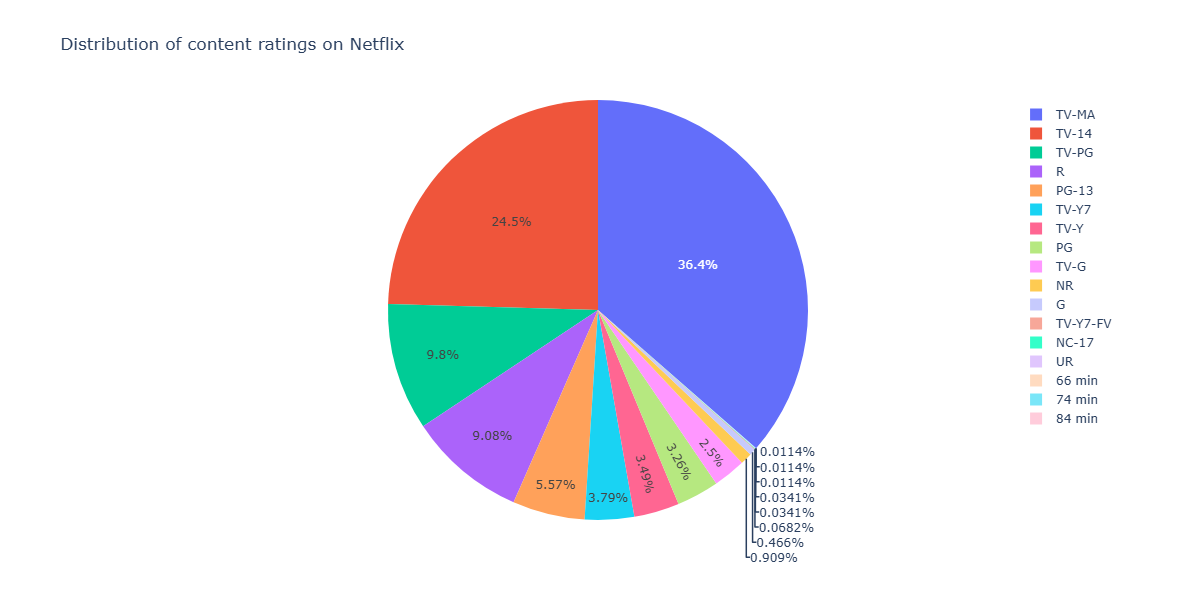

In [305]:
piechart = px.pie(x, values='counts',names='rating',title='Distribution of content ratings on Netflix')
piechart.update_layout(
    autosize=False,
    width=600,
    height=600
)
piechart.show()

In [306]:
# Analyzing the top 5 Directors on Netflix

In [307]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [308]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [309]:
directors_list = df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [310]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [311]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [312]:
directors = directors_list.groupby(['Director']).size().reset_index(name='total count')
print(directors)

                       Director  total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [313]:
directors = directors[directors.Director != 'Director not specified']
print(directors)

                       Director  total count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [314]:
directors = directors.sort_values(by=['total count'], ascending = False)
print(directors)

             Director  total count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [315]:
top5directors = directors.head()
print(top5directors)

           Director  total count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


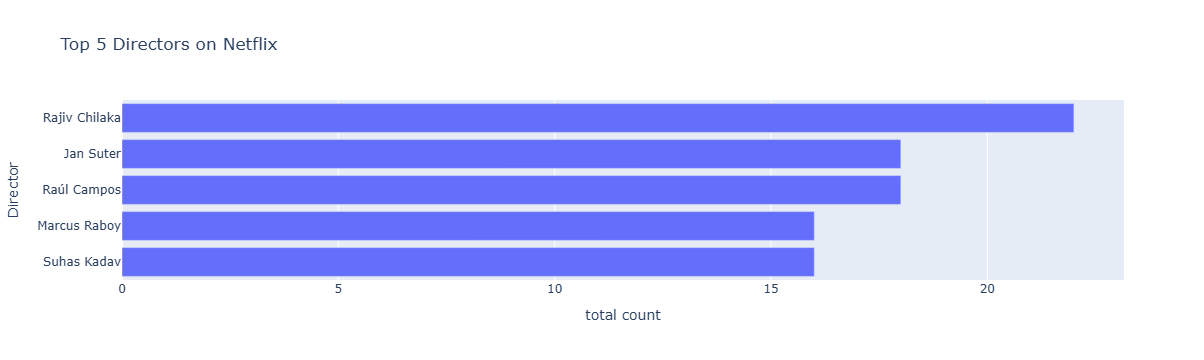

In [316]:
top5directors = top5directors.sort_values(by=['total count'])
barchart = px.bar(top5directors, x='total count', y='Director', title = 'Top 5 Directors on Netflix')
barchart.show()

In [317]:
# Analyzing the top 5 Actor on netflix

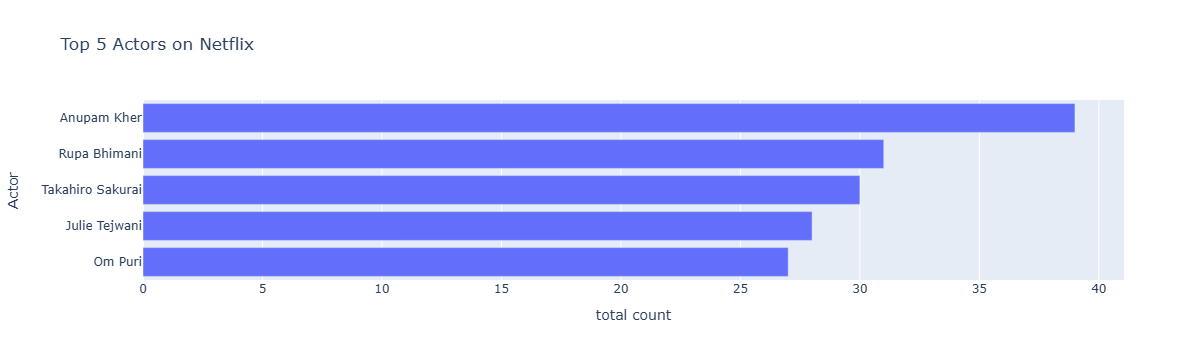

In [318]:
df['cast']=df['cast'].fillna('No case specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name='total count')
actors = actors[actors.Actor != 'No case specified']
actors = actors.sort_values(by=['total count'], ascending=False)
top5actors = actors.head()
top5actors = top5actors.sort_values(by=['total count'])
barchart2 = px.bar(top5actors, x='total count', y= 'Actor', title='Top 5 Actors on Netflix')
barchart2.show()

In [319]:
#Analyzing the content produced on netflix based on years

In [320]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns = {"release_year":"Release year", "type": "type"})
df2 = df1.groupby(['Release year', 'type']).size().reset_index(name='total count')

In [321]:
print(df2)

     Release year     type  total count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


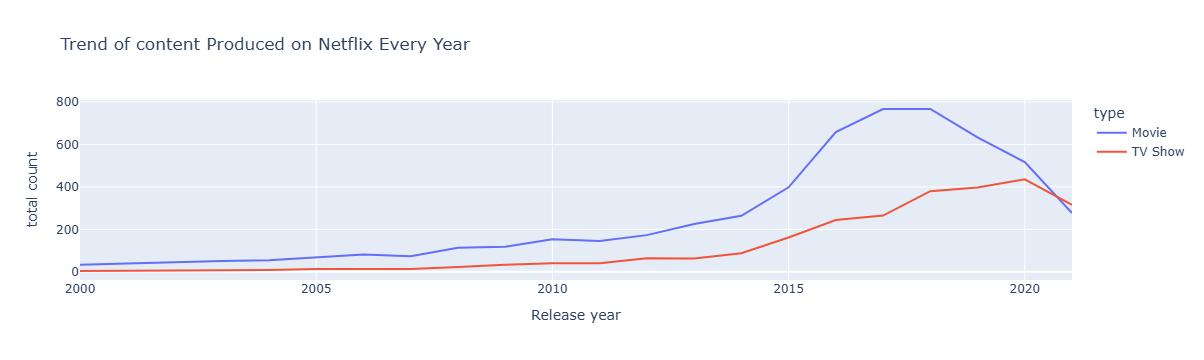

In [322]:
df2 = df2[df2['Release year']>=2000]
graph = px.line(df2, x = "Release year", y = "total count", color = "type", title = "Trend of content Produced on Netflix Every Year")
graph.show() 

In [323]:
#Sentiment Analysis of Netflix Content 

In [336]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year' : 'Release year', 'description': 'Description'})

In [337]:
df3

,Release year,Description
0,2020,"As her father nears the end of his life, filmm..."
1,2021,"After crossing paths at a party, a Cape Town t..."
2,2021,To protect his family from a powerful drug lor...
3,2021,"Feuds, flirtations and toilet talk go down amo..."
4,2021,In a city of coaching centers known to train I...
...,...,...
8802,2007,"A political cartoonist, a crime reporter and a..."
8803,2018,"While living alone in a spooky town, a young g..."
8804,2009,Looking to survive in a world taken over by zo...
8805,2006,"Dragged from civilian life, a former superhero..."


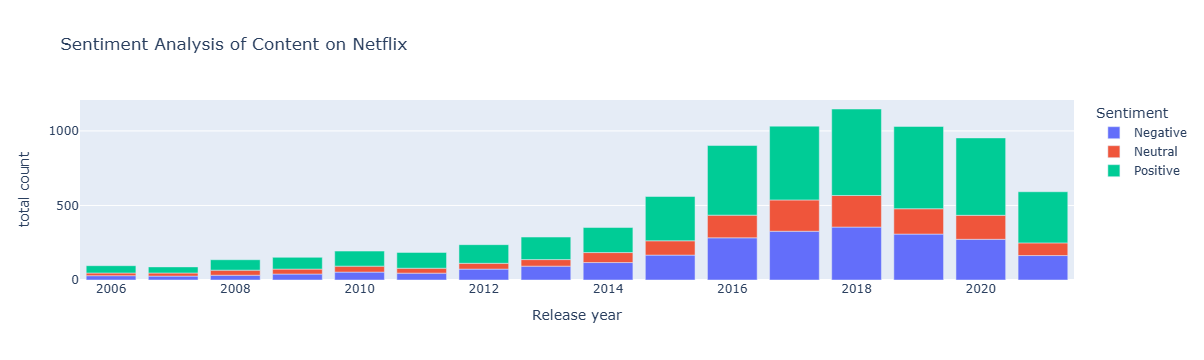

In [338]:
for index, row in df3.iterrows():
    d=row ['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p==0:
        sent = 'Neutral'
    elif p>0:
        sent = 'Positive'
    else:
        sent = 'Negative' 
    df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release year', 'Sentiment']).size().reset_index(name = 'total count')
df3 = df3[df3['Release year']>2005]
barGraph = px.bar(df3, x="Release year", y="total count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()